In [1]:
%pylab notebook
import matplotlib.pyplot as plt
import numpy as np
from charistools.readers import ModisTileCube
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/miniconda/envs/charistools/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [20]:
%cd /Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/yearly/v3/h24v05
%ls

/Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/yearly/v3/h24v05
00notes
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2001.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2002.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2003.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2004.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2005.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2006.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2007.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2008.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2009.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2010.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2011.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2012.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2013.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2014.h5


In [22]:
cube_v3.close()

In [23]:
cube_v3 = ModisTileCube('ERA_Interim_downscale_uncorrected_tsurf.v0.3.h24v05_2001.h5', varname='tsurf')
#cube_v3 = ModisTileCube('tmp.h5', varname='tsurf')

In [24]:
d5 = cube_v3.read(doy=5)

In [25]:
d5.shape

(2400, 2400)

In [26]:
np.amin(d5), np.amax(d5)

(233.78, 293.98999)

In [27]:
cube_v3.d

<type 'netCDF4._netCDF4.Variable'>
uint16 tsurf(phony_dim_0, phony_dim_1, phony_dim_1)
    packing_convention: netCDF
    packing_convention_description: unpacked = scale_factor*packed + add_offset
    scale_factor: 0.01
    add_offset: 0.0
    _FillValue: 65535
path = /500m
unlimited dimensions: 
current shape = (365, 2400, 2400)
filling off

In [28]:
cube_v2.close()

In [30]:
%cd /Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/yearly/v2/h24v05
%ls

/Users/brodzik/projects/CHARIS/forcing_data/Downscaled/ERA-Interim/yearly/v2/h24v05
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2001.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2002.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2003.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2004.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2005.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2006.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2007.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2008.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2009.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2010.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2011.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2012.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2013.h5
ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2014.h5


In [31]:
cube_v2 = ModisTileCube('ERA_Interim_downscale_uncorrected_tsurf.v0.2.h24v05_2001.h5', varname='tsurf')

In [32]:
orig_d5 = cube_v2.read(doy=5)
orig_d5.shape

(2400, 2400)

In [33]:
np.amin(orig_d5), np.amax(orig_d5)

(235.56, 293.98999)

<IPython.core.display.Javascript object>


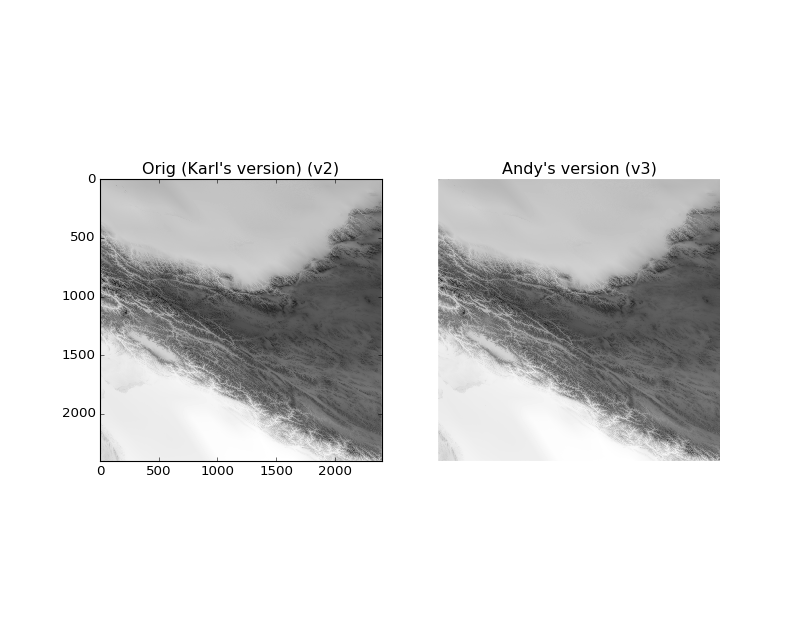

(-0.5, 2399.5, 2399.5, -0.5)

In [34]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(orig_d5, cmap=plt.cm.gray, interpolation='None')
ax[0].set_title("Orig (Karl's version) (v2)")
ax[1].imshow(d5, cmap=plt.cm.gray, interpolation='None')
ax[1].set_title("Andy's version (v3)")
plt.axis('off')
#fig.savefig('/Users/brodzik/tmp/SRTMGL3_vs_CHARIS_DEMv2.png')

In [35]:
d5.dtype, orig_d5.dtype

(dtype('float32'), dtype('float32'))

In [36]:
diff = d5 - orig_d5
print(np.amin(diff), np.amax(diff))

(-13.22998, 11.129974)


<IPython.core.display.Javascript object>


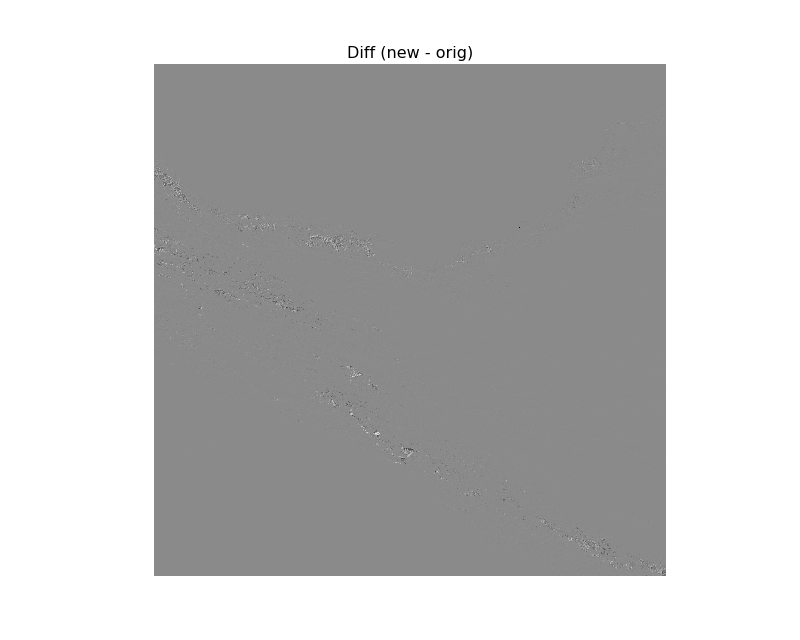

(-0.5, 2399.5, 2399.5, -0.5)

In [37]:
fig, ax = plt.subplots(1)
ax.imshow(diff, cmap=plt.cm.gray, interpolation='None')
ax.set_title("Diff (new - orig)")
plt.axis('off')

In [39]:
print(d5[2397:2399, 2397:2399])

[[ 272.94998169  272.97998047]
 [ 273.16000366  270.77999878]]


In [38]:
print(orig_d5[2397:2399, 2397:2399])


[[ 274.58999634  273.3999939 ]
 [ 275.47000122  273.94000244]]
